In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import tree

What is a Decision Tree?
A Decision Tree is a flowchart-like structure where:

Each node represents a feature (attribute),

Each branch represents a decision rule, and

Each leaf node represents an outcome (class label).

It mimics human decision-making and can be used for both:

Classification (predicting categories)

Regression (predicting continuous values)

When to Use Decision Trees
Use it when:

You want interpretable models (easy to visualize and explain)

Your data has non-linear relationships

You have a mix of categorical and numerical features

You’re dealing with missing values

🚫 Avoid if:

The data is very noisy (can overfit easily without tuning)

You need very high accuracy (other models may outperform)

In [28]:
data = load_breast_cancer()
X = data.data
y = data.target

feature_names = data.feature_names
target_names = data.target_names

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

criterion='gini'
This tells the tree how to measure the "impurity" of a node — i.e., how "mixed" the labels are at a split.

Two common options:
'gini' (Gini Impurity) → Default

'entropy' (Information Gain)

What does "Gini Impurity" mean?
It's a measure of how often a randomly chosen sample would be incorrectly classified if it was randomly labeled according to the class distribution in that node.

Gini = 0 means the node is pure (only one class).

Gini = 0.5 means the node has mixed classes (e.g., 50/50 split).

Use 'gini' for speed and simplicity. Use 'entropy' if you want a slightly more informative tree (based on information gain).

max_depth=4
This sets the maximum number of layers (levels) in the decision tree.

Why limit depth?
Deep trees can learn the training data too well (overfitting).

Shallow trees are simpler, faster, and more generalizable.

max_depth=4

Means the tree will not grow beyond 4 splits down from the root node.

This helps prevent overfitting, especially on small datasets.

In [30]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [31]:
y_pred = clf.predict(X_test)

In [32]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report\n:", classification_report(y_test, y_pred))

Accuracy: 0.9473684210526315

Classification Report
:               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



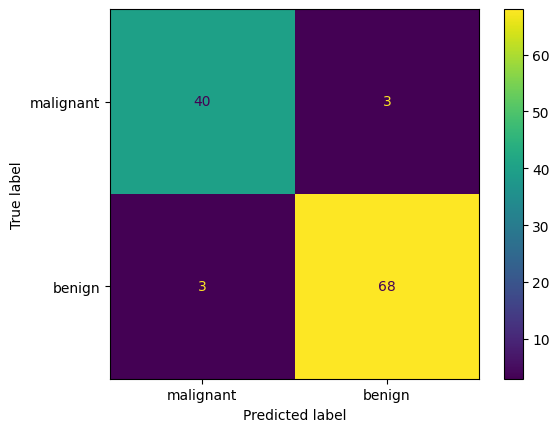

In [36]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=target_names)
plt.grid(False)

What Each Cell Means

| Cell                  | Meaning                                                |
| --------------------- | ------------------------------------------------------ |
| **Top-left (40)**     | Correctly predicted malignant cases (`True Negative`)  |
| **Top-right (3)**     | Benign cases predicted as malignant (`False Positive`) |
| **Bottom-left (3)**   | Malignant cases predicted as benign (`False Negative`) |
| **Bottom-right (68)** | Correctly predicted benign cases (`True Positive`)     |


How It Relates to the Classification Report

| Metric                    | Explanation                                                                        |
| ------------------------- | ---------------------------------------------------------------------------------- |
| **Accuracy**              | (40 + 68) / 114 = 108 / 114 ≈ **0.947** = **94.7%**                                |
| **Precision (malignant)** | 40 / (40 + 3) = **0.93** (Of all predicted malignant, 93% were actually malignant) |
| **Recall (malignant)**    | 40 / (40 + 3) = **0.93** (Of all real malignant, 93% were predicted correctly)     |
| **Precision (benign)**    | 68 / (68 + 3) = **0.96**                                                           |
| **Recall (benign)**       | 68 / (68 + 3) = **0.96**                                                           |


Text(0.5, 1.0, 'Decision Tree Visualization')

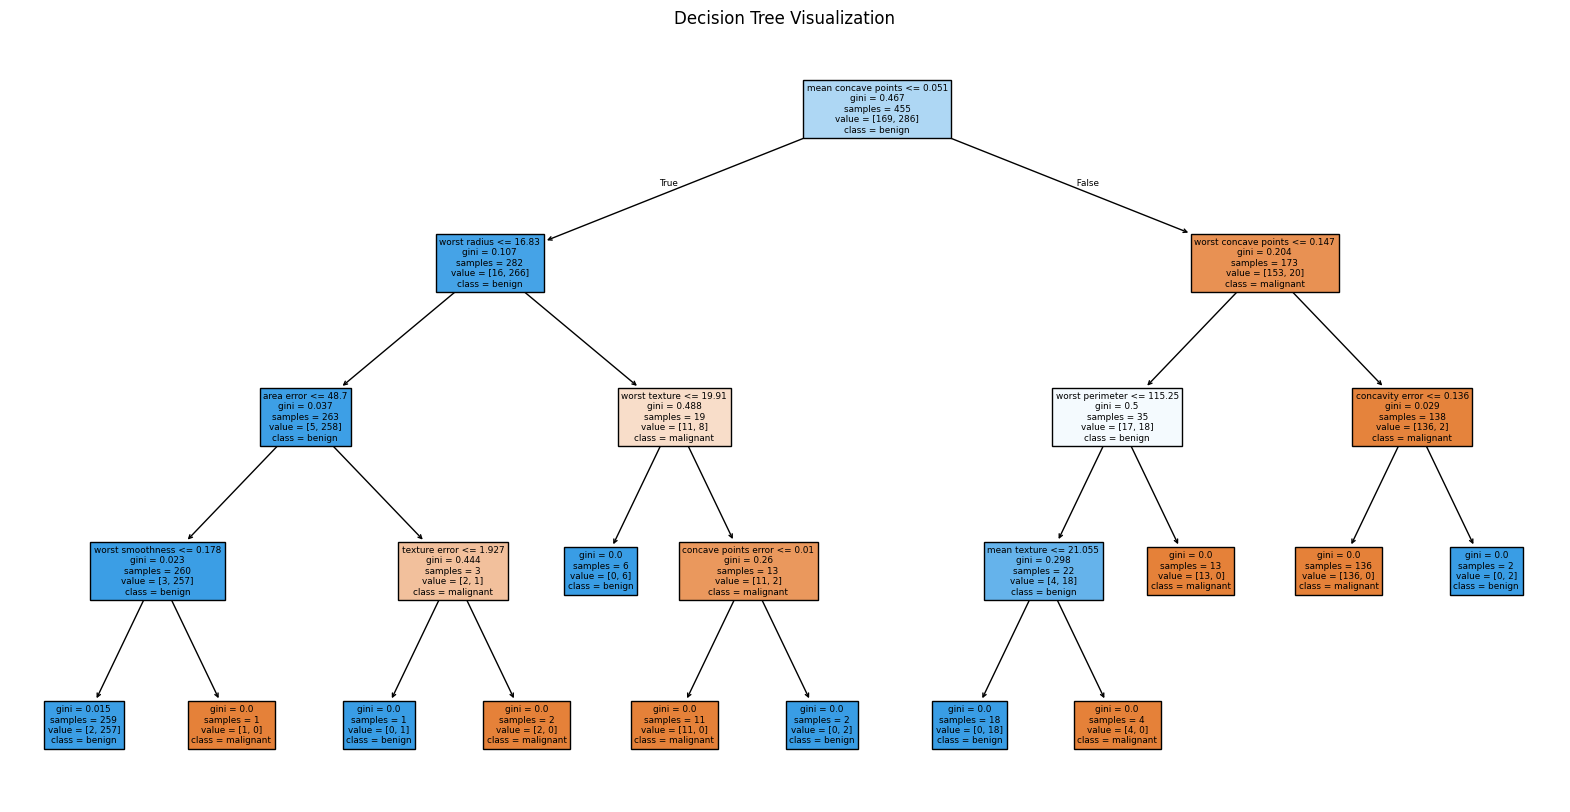

In [38]:
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=feature_names, class_names=target_names, filled=True)
plt.title("Decision Tree Visualization")

What the Plot Shows
The decision tree is built like a flowchart with questions at each node:
Node
 ├── Feature used to split (e.g., mean radius <= 12.5)
 ├── Samples: Number of training samples at that node
 ├── Value: Class counts at that node ([class_0_count, class_1_count])
 └── Class: The majority class prediction at that node

Explanation (for a node in the tree):
mean radius <= 12.5
samples = 100
value = [30, 70]
class = 1

The model asked: Is mean radius ≤ 12.5?.

There were 100 samples at this node.

Of those 100, 70 were class 1 (Malignant), 30 were class 0 (Benign).

The model will predict class 1 for this branch.


In [ ]:
When to Use plot_tree()
Use it when you want to:

Understand how your decision tree makes predictions

See the rules and thresholds used for splitting

Explain your model to non-technical audiences